In [1]:
!pip install scikit-learn
!pip install keras

In [2]:
!pip install pandas_datareader

In [3]:
!pip install yfinance

# Import Libraries

In [5]:
import math
import numpy as np
import yfinance as yf
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Dataset Formation

In [7]:
# Download data from Yahoo Finance
df = yf.download('AAPL', start='2012-01-01', end='2019-12-18')
# Display the first few rows of the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607715,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.698891,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.866310,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,66.761658,133587600


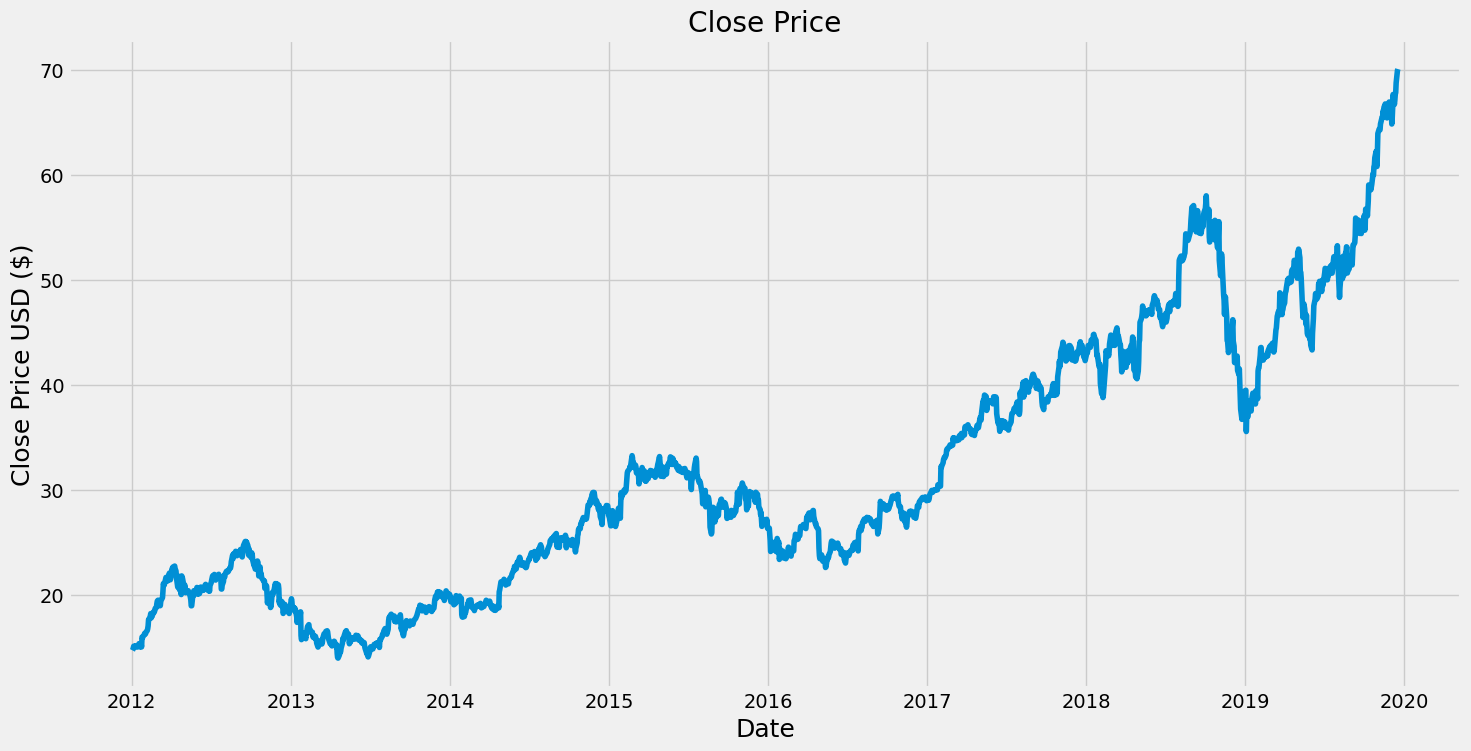

In [8]:
# Plot the results
plt.figure(figsize = (16, 8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [9]:
# Here use some other methods like cross validation because general cross validation will break the sequence in temporal data 

# Load Data

In [11]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [12]:
# Initialize the MinMaxScaler with the desired range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(dataset)

# Display the scaled data
print(scaled_data)

[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [13]:
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if (i <= 60):
        print(x_train)
        print(y_train)

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]


In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape                   

(1543, 60, 1)

# Build the Model

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\pranj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Train the Model

In [20]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1543/1543 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0013


In [21]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [22]:
x_test = np.array(x_test)

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

In [24]:
predictions = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [25]:
predictions = scaler.inverse_transform(predictions)

In [26]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.5441899804395338

# Visualize the Results

C:\Users\pranj\AppData\Local\Temp\ipykernel_29332\3798057990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


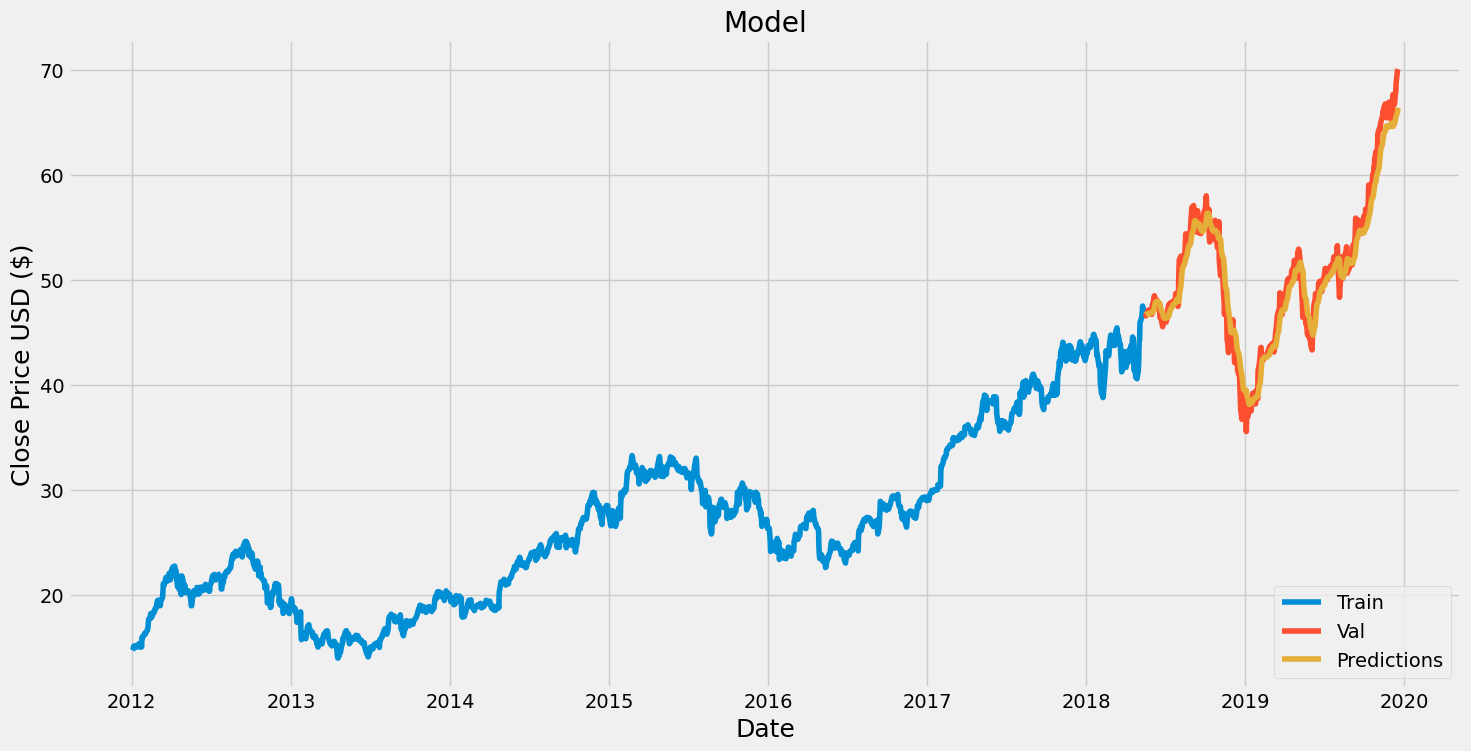

In [28]:
# Plot the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [29]:
valid

,Close,Prediction
Date,,
2018-05-17,46.747501,46.696045
2018-05-18,46.577499,46.729576
2018-05-21,46.907501,46.709843
2018-05-22,46.790001,46.712559
2018-05-23,47.090000,46.712135
...,...,...
2019-12-11,67.692497,65.188034
2019-12-12,67.864998,65.411415
2019-12-13,68.787498,65.642616


# Implement Walk-Forward Validation

In [31]:
# In this section, we will implement walk-forward validation to determine the best lookback period for the model.
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the range of lookback periods to test
lookback_periods = [30, 60, 80, 100]
results = {}

# Implement Walk-Forward Validation
for period in lookback_periods:
    errors = []
    
    for i in range(len(trainX) - period):
        trainX_subset = trainX[i:i+period]
        trainY_subset = trainY[i:i+period]
        
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX_subset.shape[1], 1)))
        model.add(LSTM(units=50))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        model.fit(trainX_subset, trainY_subset, epochs=10, batch_size=32, verbose=0)
        
        predictions = model.predict(trainX_subset)
        error = mean_squared_error(trainY_subset, predictions)
        errors.append(error)
    
    results[period] = np.mean(errors)

best_lookback = min(results, key=results.get)
print(f"Best lookback period: {best_lookback}")

NameError: name 'trainX' is not defined